<h1>1. Libraries </h1>

In [2]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style = "whitegrid")

import warnings
warnings.filterwarnings("ignore")

from IPython.core.display import display, HTML, Javascript
import IPython.display

import os
print(os.getcwd())

/Users/keshav/Desktop/Adobe/movie_recommendation


<h2> 2. Data Infernece </h2> 

In [3]:
from json_tmdb_processor import JSONProcessor
json_processor = JSONProcessor(folder_path='/Users/keshav/Desktop/Adobe/movie_recommendation/tmdb')
json_processor.process_json_files()
df_json = json_processor.get_data_frame()
#df_json

Error decoding JSON in file /Users/keshav/Desktop/Adobe/movie_recommendation/tmdb/862.0.json: Expecting value: line 1 column 1 (char 0)


In [4]:
df_rating = pd.read_csv('ratings.csv')
df_movies = pd.read_csv('movies.csv')
df_tags = pd.read_csv('tags.csv')

In [5]:
df_rat_mov = pd.merge(df_rating, df_movies, on='movieId')
df_movie_tag = pd.merge(df_movies, df_tags, on='movieId')

In [9]:
df_json.head(2)

,overview,popularity,original_title,runtime,release_date,vote_average,vote_count,status,tagline,spoken_languages,cast,id
0,"The second ""visual album"" (a collection of sho...",8.738,Lemonade,65,2016-04-23,8.497,147,Released,,en,Beyoncé|Jay-Z|Serena Williams|Zendaya|Quvenzha...,394269
1,"Set in 1929, a political boss and his advisor ...",17.518,Miller's Crossing,115,1990-09-21,7.455,1496,Released,"Up is down, black is white, and nothing is wha...",en|ga|it|yi,Gabriel Byrne|Albert Finney|Jon Polito|Marcia ...,379


In [36]:
'''df_rating.head(2)
df_movies.head(2)
df_tags.head(2)
'''

'df_rating.head(2)\ndf_movies.head(2)\ndf_tags.head(2)\n'

In [13]:
df_rat_mov.head(2)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [14]:
df_movie_tag.head(2)

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,1137206825


<h1> 3. Statistical Analysis </h1>

In [15]:
df_json.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,9621.0,17.822001,17.636767,0.6,8.769,13.503,21.083,679.514
runtime,9621.0,104.337491,24.449488,2.0,92.000,102.000,115.000,583.000
vote_average,9621.0,6.511031,0.866277,0.0,6.000,6.564,7.115,8.917
vote_count,9621.0,1462.063715,2922.864527,0.0,128.000,409.000,1374.000,34704.000
id,9621.0,53897.586114,92231.062813,2.0,9622.000,16325.000,43423.000,525662.000


In [16]:
df_json.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,9621.0,17.822001,17.636767,0.6,8.769,13.503,21.083,679.514
runtime,9621.0,104.337491,24.449488,2.0,92.000,102.000,115.000,583.000
vote_average,9621.0,6.511031,0.866277,0.0,6.000,6.564,7.115,8.917
vote_count,9621.0,1462.063715,2922.864527,0.0,128.000,409.000,1374.000,34704.000
id,9621.0,53897.586114,92231.062813,2.0,9622.000,16325.000,43423.000,525662.000


In [17]:
pd.DataFrame(df_rat_mov['rating'].describe().transpose())

,rating
count,100836.000000
mean,3.501557
std,1.042529
min,0.500000
25%,3.000000
50%,3.500000
75%,4.000000
max,5.000000


<h1>3. EDA </h1>

In [22]:
def create_user_movie_matrix(df):
    user_movie_matrix = df_rat_mov.pivot_table(index='userId', columns='movieId', values='rating', fill_value=0)
    return user_movie_matrix
user_movie_matrix = create_user_movie_matrix(df_rating)

user_movie_matrix

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,0.0,0.0,0.0,0.0,0.0,2.5,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
607,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
608,2.5,2.0,2.0,0.0,0.0,0.0,0.0,0,0.0,4.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0


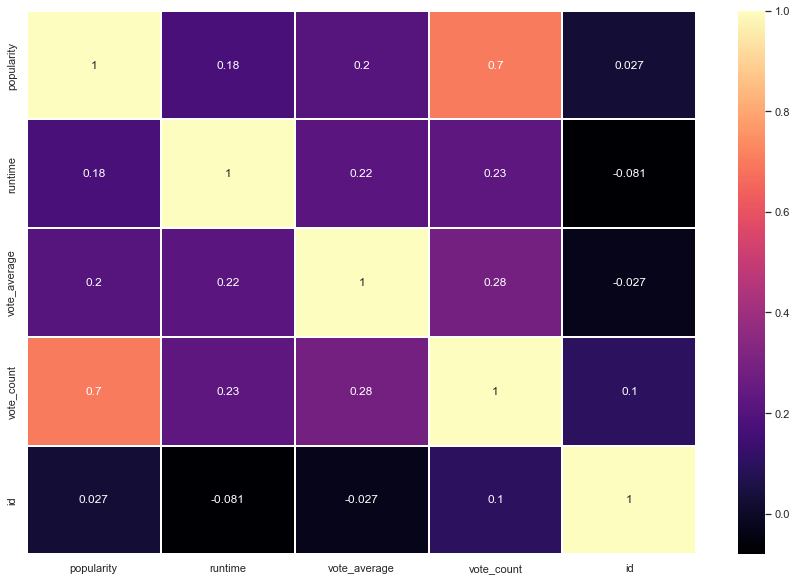

In [23]:
# Correlation between different characteristics of the movie types: 

plt.figure(figsize=(15,10))
sns.heatmap(df_json.corr(), linewidths=.1, annot=True, cmap='magma')
plt.show()

Text(0.5, 1.0, 'Data Type Distribution')

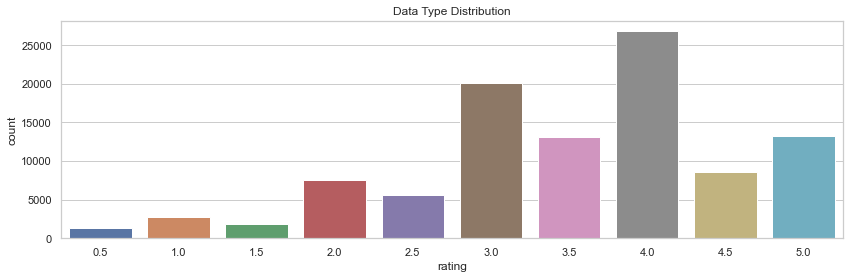

In [25]:
# Analyze distribution of ratings
plt.figure(figsize = (14,4))
sns.countplot(x = df_rat_mov['rating'])
plt.title("Rating Distribution")

<h2> 3.1 Number of ratings vs Average rating. </h2>

In [75]:
ratings_mean_count = pd.DataFrame(df_rat_mov.groupby('title')['rating'].mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(df_rat_mov.groupby('title')['rating'].count())

In [76]:
ratings_mean_count

,rating,rating_counts
title,,
'71 (2014),4.000000,1
'Hellboy': The Seeds of Creation (2004),4.000000,1
'Round Midnight (1986),3.500000,2
'Salem's Lot (2004),5.000000,1
'Til There Was You (1997),4.000000,2
...,...,...
eXistenZ (1999),3.863636,22
xXx (2002),2.770833,24
xXx: State of the Union (2005),2.000000,5


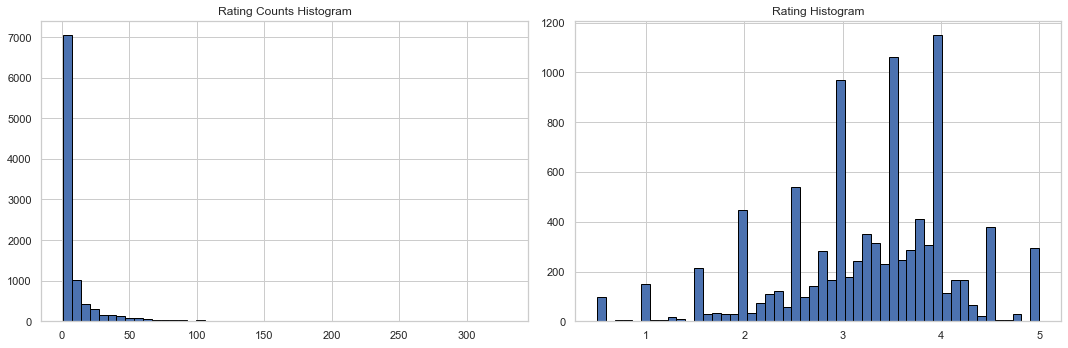

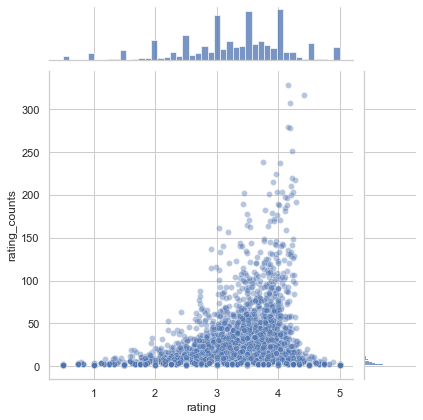

In [103]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].hist(ratings_mean_count['rating_counts'], bins=50, edgecolor='black')
axes[0].set_title('Rating Counts Histogram')

axes[1].hist(ratings_mean_count['rating'], bins=50, edgecolor='black')
axes[1].set_title('Rating Histogram')

plt.tight_layout()
plt.show()
sns.jointplot(x='rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)


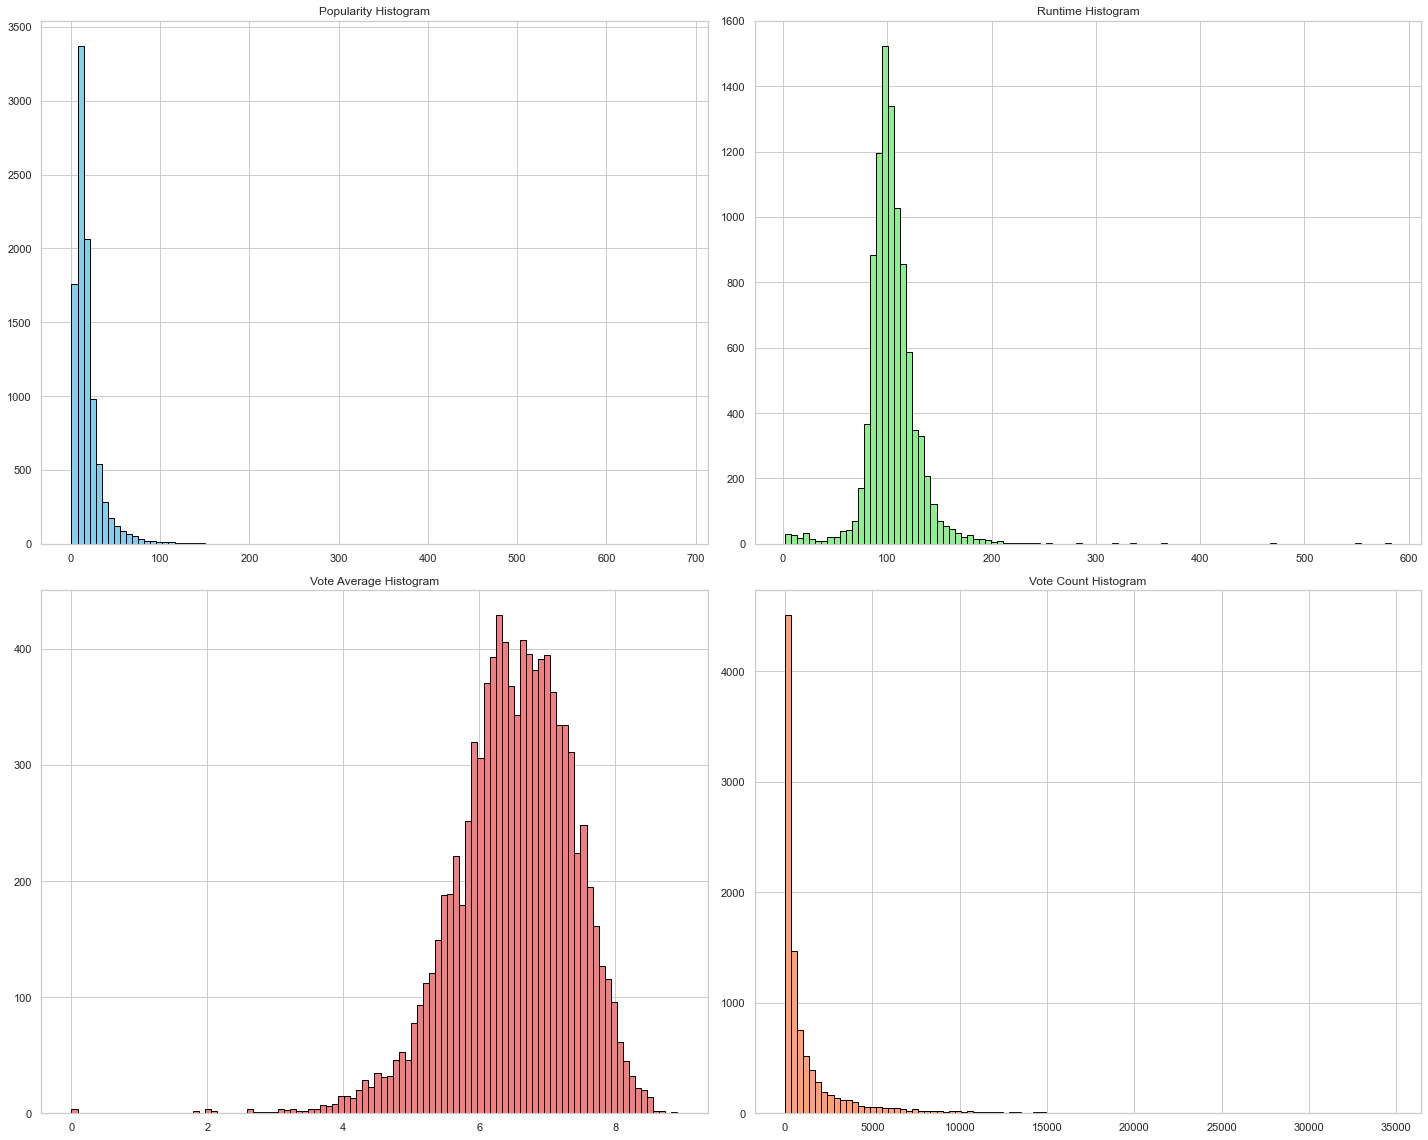

In [117]:
# Population Distribution based on: Lent
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 16))
axes = axes.flatten()  # Flatten the 2D array of axes for easy indexing

df_json['popularity'].hist(bins=100, ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Popularity Histogram')

df_json['runtime'].hist(bins=100, ax=axes[1], color='lightgreen', edgecolor='black')
axes[1].set_title('Runtime Histogram')

df_json['vote_average'].hist(bins=100, ax=axes[2], color='lightcoral', edgecolor='black')
axes[2].set_title('Vote Average Histogram')

df_json['vote_count'].hist(bins=100, ax=axes[3], color='lightsalmon', edgecolor='black')
axes[3].set_title('Vote Count Histogram')

plt.tight_layout()
plt.show()

<h1>4. Q&A </h1>

<h2>• Factors influencing user movie rentals. </h2>

In [119]:
# Most common language for movies:
df_json['spoken_languages'].value_counts().head(10)

en       5961
en|es     247
ja        214
en|fr     193
fr        170
en|it     135
es|en     133
fr|en      95
ru         92
en|ru      76
Name: spoken_languages, dtype: int64

In [120]:
# Top 10 tags of the movies:
tags_analysis = df_movie_tag.groupby('tag')['userId'].count()
tags_analysis.sort_values(ascending=False).head(10)

tag
In Netflix queue     131
atmospheric           36
thought-provoking     24
superhero             24
Disney                23
surreal               23
funny                 23
religion              22
dark comedy           21
sci-fi                21
Name: userId, dtype: int64

In [121]:
# Top 10 Genres:
genres_analysis = df_rat_mov.groupby('genres')['userId'].count()
genres_analysis.sort_values(ascending=False).head(10)

genres
Comedy                       7196
Drama                        6291
Comedy|Romance               3967
Comedy|Drama|Romance         3000
Comedy|Drama                 2851
Drama|Romance                2838
Action|Adventure|Sci-Fi      2361
Crime|Drama                  2315
Action|Crime|Thriller        1554
Action|Adventure|Thriller    1455
Name: userId, dtype: int64

In [122]:
# Top 10 movies rented:
movie_rentals = df_rat_mov.groupby('title')['userId'].count()
movie_rentals.sort_values(ascending=False).head(10)

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: userId, dtype: int64

In [ ]:
# Data View:

In [135]:
df_movie_tag.head(1)

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764


In [132]:
df_rat_mov.head(1)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [131]:
df_json.head(2)

,overview,popularity,original_title,runtime,release_date,vote_average,vote_count,status,tagline,spoken_languages,cast,id
0,"The second ""visual album"" (a collection of sho...",8.738,Lemonade,65,2016-04-23,8.497,147,Released,,en,Beyoncé|Jay-Z|Serena Williams|Zendaya|Quvenzha...,394269
1,"Set in 1929, a political boss and his advisor ...",17.518,Miller's Crossing,115,1990-09-21,7.455,1496,Released,"Up is down, black is white, and nothing is wha...",en|ga|it|yi,Gabriel Byrne|Albert Finney|Jon Polito|Marcia ...,379


<h1>5. Findings and Future Scope: </h1>

#### 1. Most commong language for the movies are:
       a. English 
       b. English and Spanish 
        
#### 2. Most popular tags are: 
       a. In Netflix queue
       b. atmospheric
       c. thought-provoking
       
#### 3. Top Genres of the Movies:
       a. Comedy
       b. Darama 
       c. Comedy|Romance 
       
#### 4. Most watched titles:
       a. Forrest Gump (1994) 
       b. Shawshank Redemption, The (1994)  
       c. Pulp Fiction (1994) 
       
### Future Scope of work: 
       1. Use NLP techniques to understand the user's intent by analysing preferred actors, dominant genres and segementing description into further categories.  